# Analisa Sistem Pembuangan dan Pengelolaan Sampah di Kota Austin Smart City

Nama: Ikhbar Firman Hanafi

Batch: 14

Phase: 0

### Objective
1. Mendeskripsikan keadaan sistem pembuangan dan pengelolaan sampah di kota Austin Smart City
2. Mengetahui apakah terdapat perbedaan besar muatan sampah pada site MRF Austin pada dua tahun terakhir.

### Problem Statement

Seiring dengan bertambahnya populasi berdampak pada peningkatan jumlah muatan sampah di kota Austin. Dalam rangka mendistribusikan sampah-sampah tersebut dibentuklah beberapa site untuk pengelolaannya, dimana tiap site memiliki mekanisme dan fasilitas dalam penanganan berbagai tipe muatan sampah. Untuk meningkatkan optimalisasi distribusi pengelolaan sampah, pemerintah kota Asutin ingin mengetahui keadaan sistem yang ada saat ini berdasarkan data sehingga dapat diambil suatu keputusan rencana kedepannya. 


#### Batasan Masalah:
1. Penelitian ini hanya berdasarkan data distribusi sampah pada tiap site yang didapat dari database Austin waste and diversion dari tahun 2000 hingga tahun 2021.
2. Analisa disini tidak memperhitungkan faktor-faktor lain di luar data seperti mekanisme operasional tiap site, performa staff dsbnya.

### Deskripsi data
Data yang digunakan disini didapat dari database 'austin_waste' menggunakan bigquery-public-data pada Google Cloud Big Query dengan kriteria sebagai berikut:
1. Hanya terdapat kolom load_time, load_type, load_weight, dropoff_site.
2. Jumlah data sebanyak 150.000 data.

Berikut ini adalah query yang digunakan untuk mengambil data di Google Cloud Platform:

SELECT load_time,load_type,load_weight, dropoff_site

FROM `bigquery-public-data.austin_waste.waste_and_diversion` 

LIMIT 150000;

Data tersebut telah disimpan dalam format csv dengan nama file 'h8dsft_P0GC3_ikhbar_firman.csv'.

### Working Area

#### Load data dan membuat DataFrame dari file data CSV.

Import library yang akan diperlukan pada penelitian ini.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Load data menjadi DataFrame.

In [53]:
data = pd.read_csv('h8dsft_P0GC3_ikhbar_firman.csv') #Memuat data sebagai DataFrame
data.head() #Menampilkan 5 baris pertama pada dataset

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00 UTC,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00 UTC,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00 UTC,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00 UTC,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00 UTC,RECYCLING - COMINGLE,1700.0,MRF


#### 1. Cleaning data

Cek apakah terdapat missing value pada data.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   load_time     150000 non-null  object 
 1   load_type     150000 non-null  object 
 2   load_weight   144934 non-null  float64
 3   dropoff_site  150000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


Dapat dilihat bahwa fitur kolom **load_weight** memiliki missing values.
Berikutnya kita akan hilangkan missing values tersebut.

In [55]:
data.dropna(inplace=True) #Remove missing value Nan pada data, dan replace pada data tersebut

Cek statistik data numerik (load_weight).

In [56]:
data.describe()

,load_weight
count,144934.000000
mean,7133.694944
std,4610.055367
min,-4480.000000
25%,3400.000000
50%,5800.000000
75%,11220.000000
max,75000.000000


Terdapat nilai minimum negatif pada fitur **load_weight** yang dirasa kurang sesuai. Oleh karena itu kita akan remove baris data dengan load_weight bernilai negatif.

In [57]:
data[data['load_weight'] < 0 ] #Menampilkan data dengan negatif load weight

,load_time,load_type,load_weight,dropoff_site
128289,2011-09-06 12:00:00 UTC,RECYCLING - SINGLE STREAM,-4480.0,TDS - MRF


Hanya terdapat satu baris data saja pada nilai load_weight yang negatif, oleh karena itu kita akan remove baris data tersebut.

In [58]:
data = data[data['load_weight'] >= 0] # Remove negative value load weight

#### 2. Exploration data

Pertama kita akan coba cek interval waktu pada data set, dengan cara mengurutkan data set berdasarkan **load_time**.

In [59]:
data_sortedtime = data.sort_values('load_time')

In [60]:
first_load_time = data_sortedtime['load_time'].min() #Mengetahui awal load time pada data
last_load_time = data_sortedtime['load_time'].max() #Mengetahui akhir load time pada data
print(f'Data load time tercatat dari {first_load_time} hingga {last_load_time}.')

Data load time tercatat dari 2000-01-26 12:39:00 UTC hingga 2021-07-11 07:07:05 UTC.


Berikutnya kita coba cek jenis-jenis **load_type** pada distribusi pembuangan dan pengelolaan sampah sebagai berikut.

In [61]:
print(f'Terdapat {data.load_type.nunique()} jenis load_type sebagai berikut:')
pd.DataFrame(data.load_type.value_counts()) #Menyajikan banyaknya kemunculan tiap load_type  dalam bentuk DataFrame

Terdapat 18 jenis load_type sebagai berikut:


,load_type
RECYCLING - SINGLE STREAM,78017
RECYCLING - PAPER,32011
RECYCLING - COMINGLE,31090
TIRES,1476
GARBAGE COLLECTIONS,840
YARD TRIMMING,662
BRUSH,640
SWEEPING,47
BULK,42
RECYCLED METAL,40


Load_type terbanyak atau *modus* dari drop off site pada kota Austin adalah **RECYCLING - SINGLE STREAM**.

Kita akan coba tinjau load weight, load type dari berdasarkan tahun.
Sebelum itu kita akan modify dataFrame dengan membuat kolom baru 'Year'.

In [62]:
year_list = []
for i in range(len(data_sortedtime)):
    year_list.append(data_sortedtime['load_time'].iloc[i][:4])
data_sortedtime['Year'] = year_list

Kita melihat perkembangan besar rata-rata muatan pada tiap tahun dair keseluruhan site.

<AxesSubplot:xlabel='Year'>

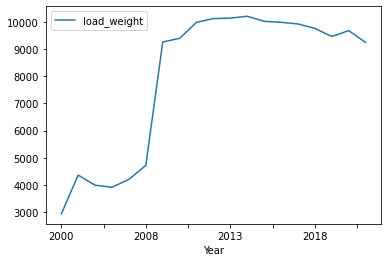

In [63]:
data_sortedtime[['Year','load_weight']].groupby('Year').mean().plot()

Dapat kita lihat besar rata-rata muatan sampah di kota Austin mengalami peningkatan yang drastis setelah tahun 2008, dan setelahnya tidak begitu fluktuatif dengan rata-rata load weight kisaran 9000-10000. Apa yang menyebabkan kenaikan tajam setelah 2008?

Untuk menjawb hal tersebut, kita coba telusuri lebih mendalam dengan plot count (frekuensi) load weight berdasarkan load type pada tiap tahun.

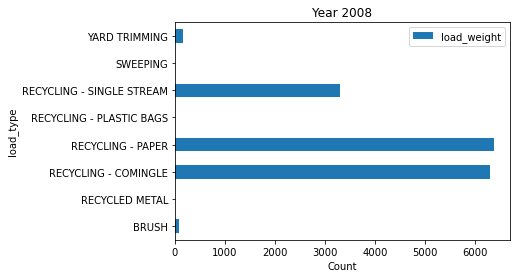

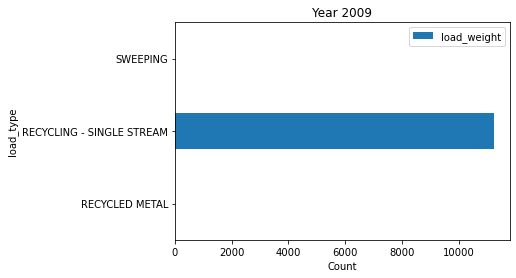

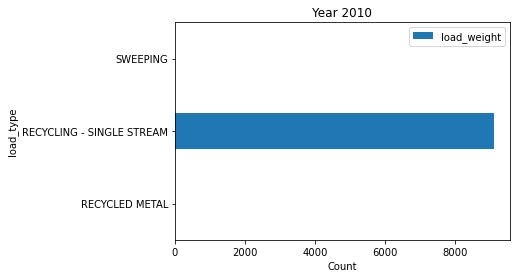

In [64]:
for i in range(2008,2011):
    fil_year = data_sortedtime['Year'] == str(i) #filter year ke-i
    data_sortedtime[fil_year][['load_weight','load_type']].groupby('load_type').count().plot.barh()
    plt.xlabel('Count')
    plt.title(f'Year {i}')

Rupanya kemunculan sampah tipe **RECYCLING - SINGLE STREAM** meningkat dari frekuensi sekitar 3000 pada tahun 2008 ke frekuensi di atas 10000 di tahun 2009.

Berikutnya kita coba mencari rata-rata load weight tiap tahun berdasarkan load type.

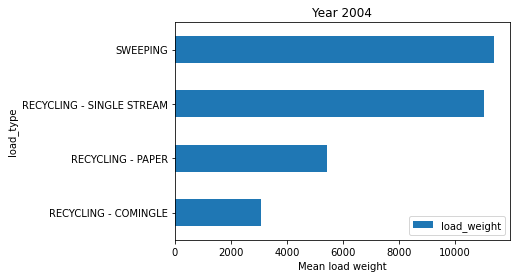

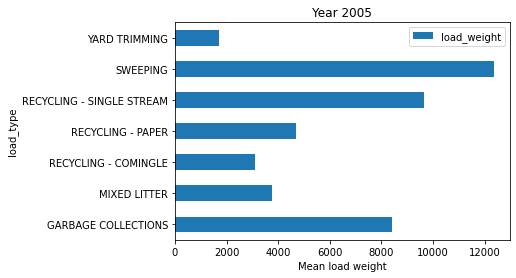

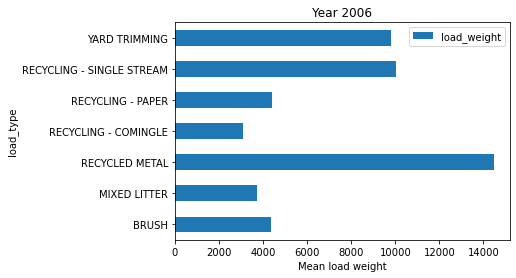

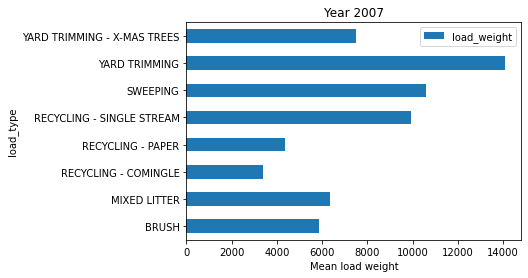

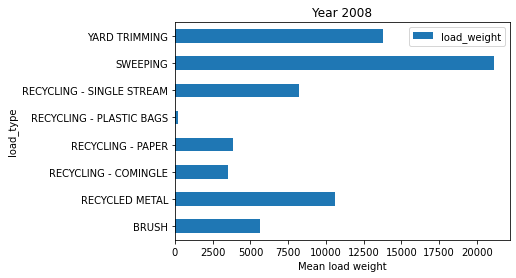

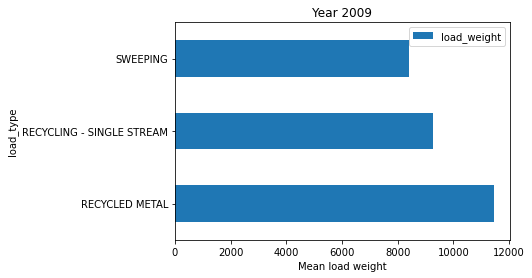

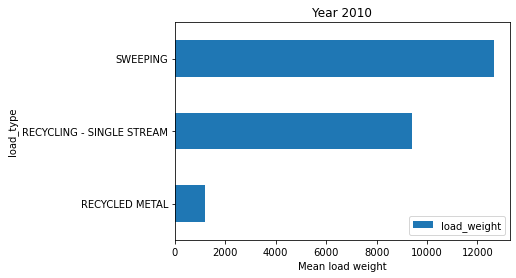

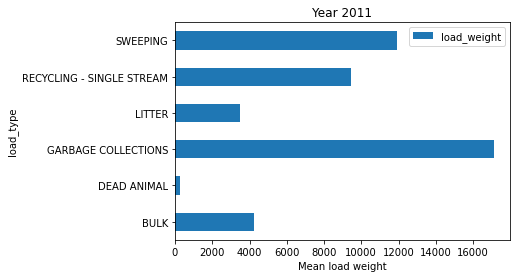

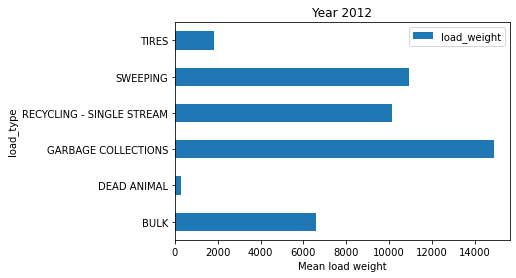

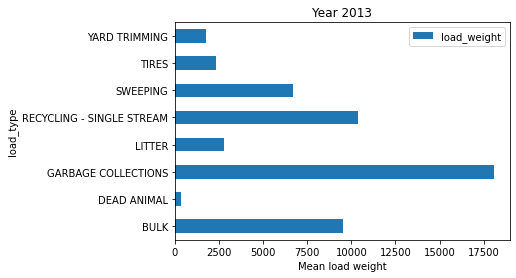

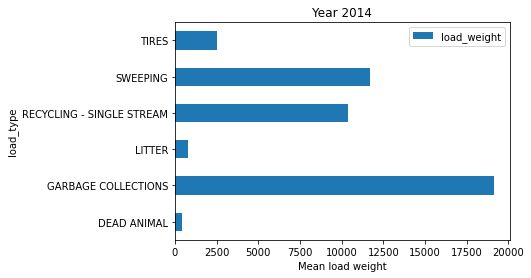

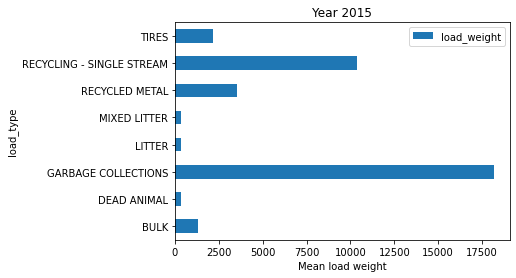

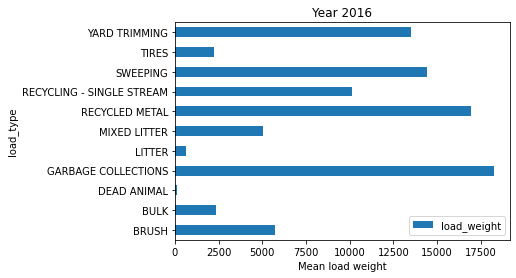

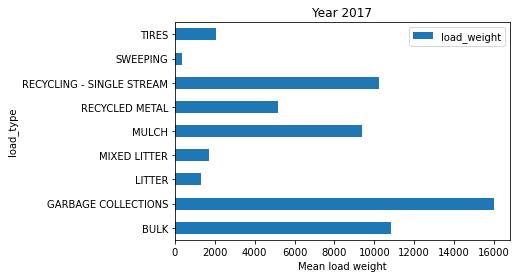

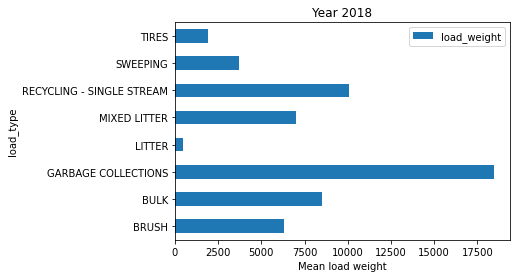

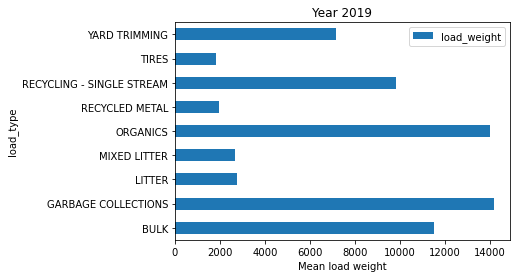

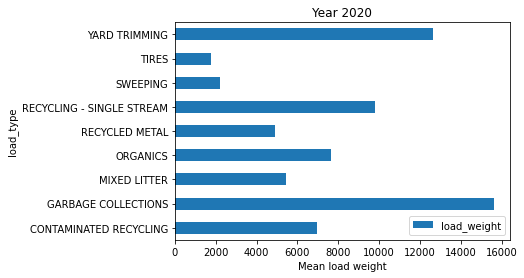

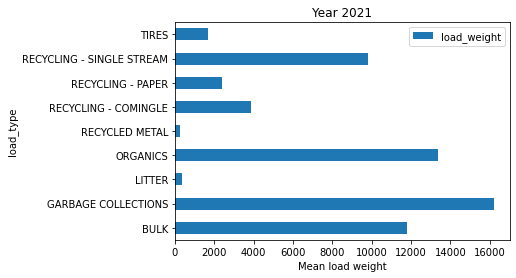

In [65]:
for i in range(2004,2022):
    fil_year = data_sortedtime['Year'] == str(i) #filter year ke-i
    data_sortedtime[fil_year][['load_weight','load_type']].groupby('load_type').mean().plot.barh()
    plt.xlabel('Mean load weight')
    plt.title(f'Year {i}')

Telah kita ketahui sebelumnya bahwa muatan **RECYCLING - SINGLE STREAM** merupakan load type terbanyak pada dataset yang melonjak cukup drastis kemunculannya serta memiliki mean yang cukup konstan sekitar 10000 tiap tahunnya. Apabila kita perhatikan setelah tahun 2010 rata-rata tertinggi tiap tahunnya adalah tipe **GARBAGE COLLECTIONS** dengan rata-rata di atas 15000. Mengapa tipe garbage collections bisa melonjak naik setelah tahun 2010? Hal tersebut mungkin perlu ditindaklanjuti oleh pemerintah kota setempat. Meskipun rata-ratanya lebih tinggi, namun frekuensinya masih jauh di bawah muatan **RECYCLING - SINGLE STREAM** yang berkontribusi terbesar dalam distribusi sampah Austin.

Berikutnya kita coba ketahui nama-nama dropoff_site beserta jumlahnya pada data set.

In [66]:
print(f'Modus dari dropoff_site adalah {data["dropoff_site"].mode().iloc[0]}.')
pd.DataFrame(data['dropoff_site'].value_counts()) #Menyajkan jumlah tiap drop off site pada data dalam bentuk DataFrame

Modus dari dropoff_site adalah MRF.


,dropoff_site
MRF,89603
TDS - MRF,54017
ZILKER,909
PARK BEND,386
WILCAB,9
ELMONT,5
KRAMER,3
CLARKSON,1


Terlihat bahwa **MRF** merupakan site frekuensi terbanyak dari total 8 site dalam dataset, kita akan coba mengetahui persentasi banyaknya site **MRF** dalam dataset.

In [67]:
percentage_mod = (data['dropoff_site'].value_counts().iloc[0]/len(data))*100 #Persentase data modus pada dataset
print(f'Terdapat {round(percentage_mod,2)} % dari data yang merupakan site MRF.')

Terdapat 61.82 % dari data yang merupakan site MRF.


Dari penjabaran di atas dapat dilihat dropoff_site terbanyak atau *modus* dari dropoff_site pada dataset adalah **MRF** sebanyak 61.79% dari data.

Terlihat dua site **MRF** dan **TDS - MRF** sangat mendominasi kemunculannya di data.

Selanjutnya kita akan coba melihat distribusi besar muatan load_weight pada tiap site.

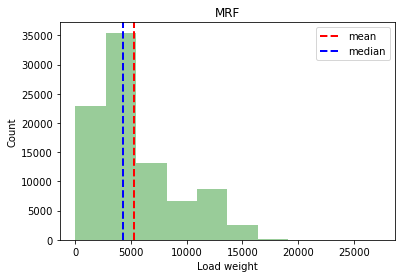

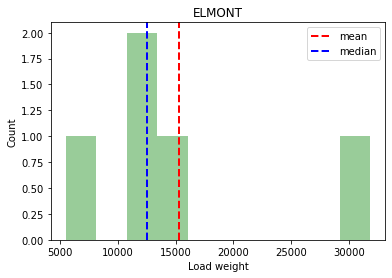

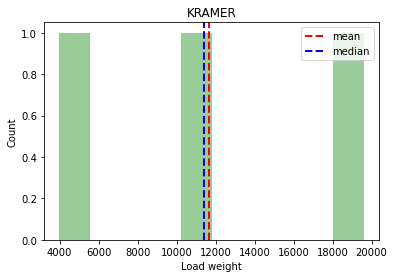

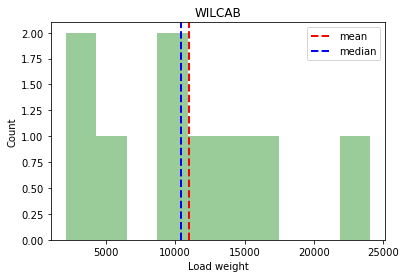

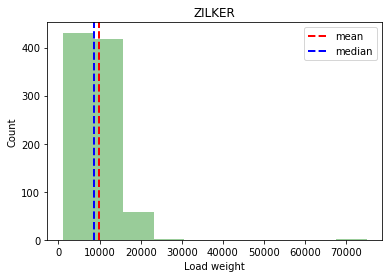

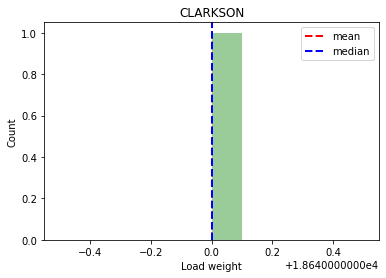

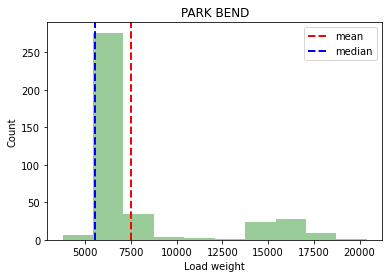

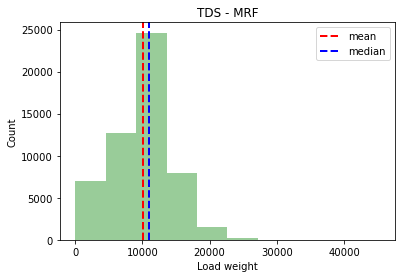

In [68]:
for i in data['dropoff_site'].unique():
    site = data[data['dropoff_site'] == i]
    plt.hist(site['load_weight'],density=False,color = 'green', alpha = 0.4)
    plt.axvline(site['load_weight'].mean(), color = 'red', linewidth = 2, label='mean',linestyle='dashed')
    plt.axvline(site['load_weight'].median(), color = 'blue',linewidth = 2, label='median',linestyle='dashed')
    plt.title(i)
    plt.xlabel('Load weight')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

Tiap site memiliki rentang muatan yang berbeda-beda, seperti pada dua site frekuensi terbanyak **MRF** dan **TDS - MRF**, dimana **TDS - MRF** cenderung memiliki load_weight yang lebih besar.

Kita coba tinjau masa aktif, rentang load weight dan jenis load pada tiap site.

In [69]:
for i in data['dropoff_site'].unique():
    k = data_sortedtime[data_sortedtime['dropoff_site'] == i]
    min_lt = k.load_time.min()
    max_lt = k.load_time.max()
    range_lt = int(max_lt[:4])-int(min_lt[:4])
    min_lw = k.load_weight.min()
    max_lw = k.load_weight.max()
    range_lw = max_lw - min_lw
    load_type = k.load_type.nunique()
    print(f'Site "{i}" aktif dari tahun {min_lt[:4]} selama {range_lt} tahun dengan load weight dari {round(min_lw)} hingga {round(max_lw)} dan memiliki {load_type} jenis load type.')

Site "MRF" aktif dari tahun 2000 selama 21 tahun dengan load weight dari 0 hingga 27320 dan memiliki 14 jenis load type.
Site "ELMONT" aktif dari tahun 2005 selama 9 tahun dengan load weight dari 5480 hingga 31857 dan memiliki 1 jenis load type.
Site "KRAMER" aktif dari tahun 2004 selama 2 tahun dengan load weight dari 3980 hingga 19600 dan memiliki 2 jenis load type.
Site "WILCAB" aktif dari tahun 2005 selama 11 tahun dengan load weight dari 2100 hingga 24060 dan memiliki 3 jenis load type.
Site "ZILKER" aktif dari tahun 2006 selama 14 tahun dengan load weight dari 1000 hingga 75000 dan memiliki 5 jenis load type.
Site "CLARKSON" aktif dari tahun 2005 selama 0 tahun dengan load weight dari 18640 hingga 18640 dan memiliki 1 jenis load type.
Site "PARK BEND" aktif dari tahun 2006 selama 15 tahun dengan load weight dari 3750 hingga 20400 dan memiliki 3 jenis load type.
Site "TDS - MRF" aktif dari tahun 2010 selama 11 tahun dengan load weight dari 0 hingga 45305 dan memiliki 12 jenis load

#### 3. Mengukur central tendency data
Dikarenakan data pada dropoff_site dan load_type merupakan data non numerik atau terbilang data kategori, maka central tendency yang cocok adalah *modus* yaitu site **MRF** dan load_type **RECYCLING - SINGLE STREAM**.

Sedangkan untuk mencari central tendency data numerik load_weight, kita akan cek grafik distribusi frekuensinya terlebih dahulu.

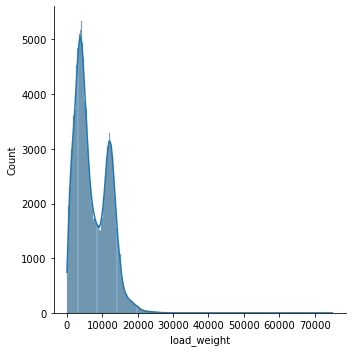

In [70]:
sns.displot(data['load_weight'], kde=True) #Plot grafik distribusi frekuensi data load_weight

<AxesSubplot:xlabel='load_weight'>

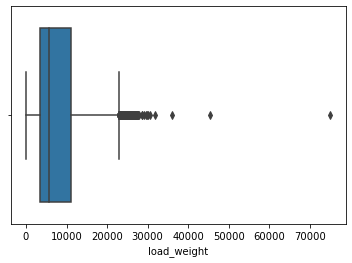

In [71]:
sns.boxplot(x = data['load_weight']) #Membuat boxplot dari data load_weight

Dari histogram dan boxplot di atas terlihat data load_weight memiliki positive skewness atau right skewed dan memiliki banyak sekali outlier. Oleh karena itu central tendency yang cocok digunakan adalah *median*.

In [72]:
print(f' Central tendency(median) dari data load_weight adalah {data["load_weight"].median()}.')

 Central tendency(median) dari data load_weight adalah 5800.0.


Besar muatan sampah di Austin cenderung di bawah 20000 dengan median 5800, dimana 50% besar muatan berada di bawah 5800, dan 50% besar muatan diatas 5800. Hal tersebut dominasi oleh site **MRF dan TDS-MRF** yang telah aktif dari tahun 2000 hingga sekarang (2021) dengan mean dan median sekitar 5000 (berdasarkan histogram sebelumnya). Salah satu faktornya yang mungkin adalah karena kedua site tersebut memiliki fasilitas dalam pengolahan daur ulang(recycle), dan jenis sampah terbanyak adalah sampah **RECYCLING - SINGLE STREAM** (modus load_type) dan **RECYCLING - PAPER**. Namun terdapat banyak site yang nampak telah tidak aktif (tidak tercatat data berdasarkan load_time) seperti **KRAMER,CLARKSON** yang masa aktifnya bahkan kurang dari 3 tahun. Site selain **MRF** tersebut nampak berkontribusi terhadap banyaknya outlier di besar muatan pada data, seperti pada site **ZILKER** dengan besar muatan maksimum 75000 dengan load type **YARD TRIMMING - X-MAS TREES** yang mana site tersebut nampak sudah tidak aktif di tahun 2020. Berdasarkan hal tersebut pemerintah kota mungkin bisa mencari berbagai faktor lain yang mempengaruhi aktif tidaknya site kota Austin.

#### 4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.
Berdasarkan penjabaran sebelumnya, site yang paling menarik perhatian saya adalah **MRF**, karena site terebut telah aktif dari tahun 2000 hingga sekarang (2021) dan sangat mendominasi distribusi sampah di Austin. Selain itu site MRF juga memiliki banyak tipe load sampah, yaitu sejumlah 14 antara lain :

'RECYCLING - PAPER', 'RECYCLING - COMINGLE', 'RECYCLING - SINGLE STREAM', 'YARD TRIMMING', 'GARBAGE COLLECTIONS', 'SWEEPING', 'RECYCLED METAL', 'MIXED LITTER', 'RECYCLING - PLASTIC BAGS', 'BULK', 'TIRES', 'BRUSH', 'MULCH', 'ORGANICS'.

#### 5. Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

Memvisualisasikan outliers pada data di site **MRF**.

<AxesSubplot:xlabel='load_weight'>

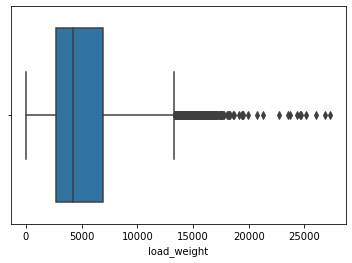

In [73]:
load_weight_mrf = data_sortedtime[data_sortedtime['dropoff_site'] == 'MRF']['load_weight'] #Filter data load_weight pada site MRF
sns.boxplot(x = load_weight_mrf) #Boxplot pada data load_weight site MRF

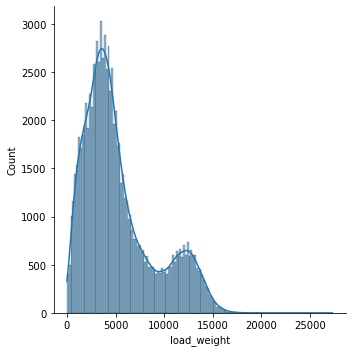

In [74]:
sns.displot(load_weight_mrf, kde=True) #Histogram load_weight site MRF

Terlihat grafik distribusi load weight pada site MRF serupa dengan grafik dari keseluruhan data. Hal tersebut dikarenakan sebagian besar data berasal dari site MRF dengan persentase 61.79%.

Kita coba mengetahui banyaknya outlier

In [75]:
q1 = load_weight_mrf.quantile(0.25) #Mencari kuartil bawah
q3 = load_weight_mrf.quantile(0.75) #Mencari kuartial atas
iqr = q3-q1 #Interquartile range
outlier_filter = (load_weight_mrf < q1-1.5*iqr)|(load_weight_mrf > q3+1.5*iqr) #Filter data outlier
outliers = load_weight_mrf[outlier_filter]
prop_outliers = len(outliers)/len(load_weight_mrf) #Rasio banyaknya outlier pada data
print(f'Terdapat sebanyak {len(outliers)} atau {round(prop_outliers*100)}% outlier pada data.')

Terdapat sebanyak 3471 atau 4% outlier pada data.


In [76]:
load_weight_mrf_remove = load_weight_mrf[~outlier_filter] #Membuat data loadweight MRF tanpa outlier
med_after = load_weight_mrf_remove.median() #Mencari median tanpa outlier
print(f'Central tendency median load_weight site MRF sebelumnya adalah {round(load_weight_mrf.median())}, sesudah remove outliers menjadi {round(med_after)}.')

Central tendency median load_weight site MRF sebelumnya adalah 4260, sesudah remove outliers menjadi 4140.


Dapat dilihat nilai median tidak begitu berubah, dikarenakan pemilihan central tendency adalah *median* dari disitribusi data positive skew dan memiliki outlier.

#### 6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota.

In [77]:
var_mrf = round(load_weight_mrf_remove.var(),2) #Mencari variance
std_mrf = round(load_weight_mrf_remove.std(),2) #Mencari standar deviasi
range_mrf = round(load_weight_mrf_remove.max() - load_weight_mrf_remove.min()) # Mencari range atau jangkauan
print(f'Range dari data site MRF adalah {range_mrf}')
print(f'Variance dari data site MRF adalah {var_mrf}')
print(f'Standar deviasi dari data site MRF adalah {std_mrf}')

Range dari data site MRF adalah 13320
Variance dari data site MRF adalah 10598898.24
Standar deviasi dari data site MRF adalah 3255.59


Mencari persentase data berada di interval $[\mu-\sigma,\mu+\sigma]$

In [78]:
mean_std_filter = (load_weight_mrf_remove.mean() - load_weight_mrf_remove.std() < load_weight_mrf_remove) &  (load_weight_mrf_remove< load_weight_mrf_remove.mean() + load_weight_mrf_remove.std())
mean_std =load_weight_mrf_remove[mean_std_filter]
percentage_meanstd = (len(mean_std)/len(load_weight_mrf_remove))*100
round(percentage_meanstd)

70

Kita akan coba ketahui jenis muatan sampah yang berada di interval $[\mu-\sigma,\mu+\sigma]$

In [79]:
mrf_data = data_sortedtime[data_sortedtime['dropoff_site'] == 'MRF'][~outlier_filter]
mrf_data[mean_std_filter][['load_type','load_weight']].groupby('load_type').count()

,load_weight
load_type,
BRUSH,1
BULK,2
MIXED LITTER,1
RECYCLING - COMINGLE,25721
RECYCLING - PAPER,25243
RECYCLING - SINGLE STREAM,8719
SWEEPING,5
TIRES,669
YARD TRIMMING,2


Visualisasi load weight data site **MRF** interval $[\mu-\sigma,\mu+\sigma]$.

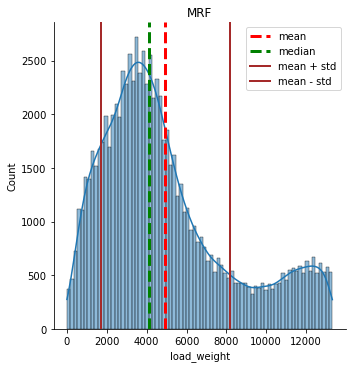

In [80]:
sns.displot(load_weight_mrf_remove, kde=True)
plt.axvline(load_weight_mrf_remove.mean(), color = 'red', linewidth=3, linestyle = 'dashed',label='mean')
plt.axvline(load_weight_mrf_remove.median(), color = 'green', linewidth=3, linestyle = 'dashed',label='median')
plt.axvline(load_weight_mrf_remove.mean()+load_weight_mrf_remove.std(), color = 'brown', linewidth=2, label = 'mean + std')
plt.axvline(load_weight_mrf_remove.mean()-load_weight_mrf_remove.std(), color = 'brown', linewidth=2, label = 'mean - std')
plt.title('MRF')
plt.legend()

Site MRF memiliki rentang berat muatan 13280, dimana sekitar 70% besar muatan berada di antara 1700 dan 8190 dengan mayoritas jenis muatan **RECYCLING - COMINGLE** dan **RECYCLING - PAPER** dari tahun 2004 hingga 2021.

Note:
1. Hanya terdapat 1 baris data saja yang tercatat di data dibawah 2004 yaitu tahun 2000, jadi dapat dikatakan data tercatat dari tahun 2004.
2. $[\mu-\sigma,\mu+\sigma]=[1700,8190]$ Rentang interval tersbut dipengaruhi oleh variance ataupun standar deviasi, dimana semakin besar standar deviasi maka data cenderung menyebar terhadap mean yang menyebabkan interval tersebut juga lebih besar, begitu pula sebaliknya.

#### 7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

~ Kita akan mencari confidence interval mean besar muatan (load weight) dengan asumsi populasi berdistribusi normal dengan mean dan variance yang tidak diketahui. Data yang digunakan adalah data load_weight pada site **MRF** saja. Diakrenakan grafik distribusi load weight pada site MRF serupa dengan grafik dari keseluruhan data dan sebagian besar data berasal dari site MRF dengan persentase 61.79%. Jadi dapat dikatakan bahwa data load_weight site **MRF** merupakan sample dari data observasi keseluruhan yang cocok untuk mencerminkan populasi load weight kota Austin.

Kita akan mencari 95 %confidence interval mean dengan normal distribution dikarenakan jumlah data cukup besar (untuk jumlah data $\le 30$ biasa menggunakan t-distribution) berdasarkan mean dan standard deviation dari data load_weight site **MRF**.

In [81]:
ci = stats.norm.interval(0.90, loc=load_weight_mrf_remove.mean(), scale=load_weight_mrf_remove.std()) #Mencari confidence interval
max_mean = round(ci[1],2)
print(f'Perkiraan muatan maksimum berdasarkan confidence interval sebesar {max_mean}.')

Perkiraan muatan maksimum berdasarkan confidence interval sebesar 10296.53.


Mengingat proporsi data site **TDS - MRF** juga cukup banyak dari keseluruhan observasi data, sebagai bahan pertimbangan tambahan kita coba tinjau max load weight pada site tersebut.

In [82]:
data_sortedtime[data_sortedtime['dropoff_site'] == 'TDS - MRF'][['load_type','load_weight']].groupby('load_type').max()

,load_weight
load_type,
BRUSH,6320.0
BULK,16060.0
CONTAMINATED RECYCLING,6980.0
DEAD ANIMAL,1300.0
GARBAGE COLLECTIONS,35980.0
LITTER,3760.0
MIXED LITTER,7000.0
RECYCLED METAL,16940.0
RECYCLING - SINGLE STREAM,45305.0


Dapat dilihat jumlah muatan pada site **TDS - MRF** dapat mencapai 45000 untuk jenis **RECYCLING - SINGLE STREAM** dan 36000 untuk jenis **GARBAGE COLLECTIONS**.

Berikut adalah saran-saran terkait kapasitas muatan sampah pada site baru berdasarkan analisis data:
1. Site memiliki fasilitas dalam recycling seperti **MRF** atau **TDS-MRF** mengingat kebanyakan load type adalah recycling.
2. Besar kapasitas penampungan sebesar 11000, lebih besar tentu lebih baik namun bisa disesuaikan anggaran.
3. Apabila pada site baru muatan berlebih , maka muatan tersebut dapat didistribusikan ke site **TDS-MRF** maupun **PARK-BEN** tergantung dari jenis muatan sampah (load_type).

#### 8. Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima).

Site MRF menjadi sentral distribusi dan pengolahan sampah di kota Austin. Pemerintah kota ingin mengetahui apakah terdapat perbedaan yang signifikan dalam dua tahun terakhir ini (tahun 2020 dengan tahun 2021). 

Hipotesis dalam kasus disini adalah:
1. Tidak terdapat perbedaaan yang signifikan antara jumlah muatan pada tahun 2020 dan 2021
2. Terdapat perbedaaan yang signifikan antara jumlah muatan pada tahun 2020 dan 2021

Atau dapat ditulis sebagai berikut:

$H_0:\mu_1=\mu_2$

$H_1:\mu_1\neq\mu_2$

Dimana $\mu_1$ dapat diasosiasikan sebagai rata-rata populasi data load weight MRF tahun 2020, sedangkan $\mu_2$ merupakan rata-rata populasi data load weight MRF tahun 2021.

Uji hipotesis yang dilakukan adalah **Two Samples Independent Two Tailed Hypothesis testing** dengan significance level pada pengujian ini sebesar 0.05, dan kriteria pengambilan keputusan adalah:
- Accept $H_0$ apabila *p-value* $>0.05$
- Reject $H_0$ apabila *p-value* $<0.05$

Beberapa asumsi data pada uji hipotesis ini antara lain:
1. Kedua populasi berdistribusi normal dengan mean dan variance sama.
2. Kedua distribusi saling bebas atau independent.



Sebelum dilakukan uji hipotesis, kita akan membentuk dua data load weight di site MRF untuk tahun 2020 dan 2021.

In [83]:
data_mrf = data_sortedtime[(data_sortedtime['dropoff_site'] == 'MRF') & ~outlier_filter] # Data site MRF tanpa outlier
filter_2020 = (data_mrf['load_time'] < '2021-01-01') & (data_mrf['load_time'] >= '2020-01-01') #Filter tahun 2020, bisa juga menggunakan kolom 'Year'
filter_2021 = (data_mrf['load_time'] < '2022-01-01') & (data_mrf['load_time'] >= '2021-01-01') #Filter tahun 2021, bisa juga menggunakan kolom 'Year'
data_mrf_2020 = data_mrf[filter_2020]['load_weight'] #Data loadweight untuk tahun 2020
data_mrf_2021 = data_mrf[filter_2021]['load_weight'] #Data loadweight untuk tahun 2021

C:\Users\ikhbar\AppData\Local\Temp\ipykernel_9804\627402182.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_mrf = data_sortedtime[(data_sortedtime['dropoff_site'] == 'MRF') & ~outlier_filter] # Data site MRF tanpa outlier


Cek rata-rata pada tahun 2020 dan tahun 2021.

In [84]:
print(f'Mean load weight site MRF 2020 is {data_mrf_2020.mean()}.')
print(f'Mean load weight site MRF 2021 is {data_mrf_2021.mean()}.')

Mean load weight site MRF 2020 is 1773.7905405405406.
Mean load weight site MRF 2021 is 2332.1788321167883.


Membuat ilustrasi derah rejcet dan accept null hypothesis pada kedua ditribusi tahun 2020 dan tahun 2021.

c:\Users\ikhbar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\ikhbar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


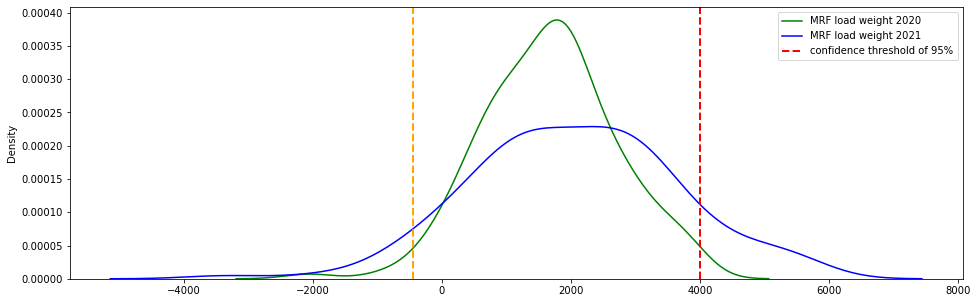

In [85]:
pop_2020 = np.random.normal(data_mrf_2020.mean(),data_mrf_2020.std(),150)
pop_2021 = np.random.normal(data_mrf_2021.mean(),data_mrf_2021.std(),150)

ci = stats.norm.interval(0.95, data_mrf_2020.mean(), data_mrf_2020.std())
plt.figure(figsize=(16,5))
sns.distplot(pop_2020,label='MRF load weight 2020',color = 'green',hist=False)
sns.distplot(pop_2021,label='MRF load weight 2021',color = 'blue',hist=False)

plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='orange', linestyle='dashed', linewidth=2)
plt.legend()

note: Gambar di atas hanya sebuah ilustrasi reject area pada area terletak di kanan garis merah atau sebelah kiri garis orange dan accept area di antara garis merah dan orange. Posisi garis merah dan pink tidak  berdasarkan nilai aktual dari distribusi.

Mencari nilai *p-value* dan *t-statistics* sebagai bahan pertimbangan uji hipotesis.

In [86]:
t_stat, p_val = stats.ttest_ind(data_mrf_2020,data_mrf_2021)
print('P-value:',p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.0003892312059167894
t-statistics: -3.576170016136689


Berdasarkan *p-value* 0.000313 yang mana lebih kecil dari 0.05, maka kita **reject null hypothesis**. Dapat diaktakan bahwa terdapat perbedaan signifikan antara load weight tahun 2020 dengan tahun 2021. Apabila melihat dari mean kedua tahun tersebut, kita juga dapat menyimpulkan bahwa terjadi peningkatan load weight dari tahun 2020 ke 2021. Kita juga dapat membuktikan hal tersebut dengan melakukan uji one tail, niscaya didapatkan kesimpulan yang sama.

Kesimpulan untuk pemerintah kota: **Terdapat perbedaan signifikan antara load weight site MRF tahun 2020 dengan load weight 2021.**

#### 9. Tarik benang merah dan kesimpulan dari perhitungan dan analisa yang kamu telah lakukan di langkah-langkah sebelumnya. Ceritakan kesimpulanmu kepada pemerintah kota dan hindari bahasa teknis yang tidak dimengerti oleh orang yang bukan data scientist!

Overall analysis:

Kota Austin memiliki total 8 site dalam distribusi dan pengelolaan sampah, dimana terdapat 18 jenis muatan sampah. 
Berdsarkan data observasi rata-rata berat muatan sampah meningkat tiap tahun, dimana terjadi peningkatan drastis setelah tahun 2018. Hal tersebut dipicu oleh kenaikan tajam muatan RECYCLING - SINGLE STREAM dengan rata-rata berat muatan sekitar 10000 dan konstan tiap tahun berikutnya. Site MRF dan site TDS - MRF memiliki kontribusi terbesar dalam muatan sampah dimana 61,82% muatan berada di site MRF. Salah satu faktornya yang mungkin adalah karena kedua site tersebut memiliki fasilitas dalam pengolahan daur ulang(recycle), dimana tipe muatan terbanyak merupakan adalah tipe recycling.

Namun terdapat banyak site yang nampak telah tidak aktif (tidak tercatat data berdasarkan load_time) seperti KRAMER,CLARKSON yang masa aktifnya bahkan kurang dari 3 tahun. Berdasarkan jenis muatan sampahnya, diduga banyak site tersebut tidak memiliki fasilitas pada MRF dan TDS - MRF terutama dalam proses recycling.
Apabila pemerintah kota Austin berencana membuka site baru, site MRF dapat dijadikan acuan pertimbangan. Site MRF memiliki pusat distribusi besar muatan sekitar 4200 dengan rentang berat muatan 13280, dimana sekitar 70% berat muatan berada di antara 1700 dan 8190 dengan mayoritas jenis muatan RECYCLING - COMINGLE, RECYCLING - PAPER, dan RECYCLING - SINGLE STREAM dari tahun 2004 hingga 2021. Berdasarkan hasil uji statistik terdapat perbedaan signifikan antara load weight site MRF tahun 2020 dengan load weight 2021.

Berikut adalah saran-saran terkait kapasitas muatan sampah pada site baru berdasarkan analisis data:
1. Site memiliki fasilitas dalam recycling seperti MRF atau TDS-MRF mengingat kebanyakan load type adalah recycling.
2. Besar kapasitas penampungan sebesar 11000, lebih besar tentu lebih baik namun bisa disesuaikan anggaran.
3. Apabila pada site baru muatan berlebih , maka muatan tersebut dapat didistribusikan ke site TDS-MRF maupun PARK-BEN tergantung dari jenis muatan sampah (load_type).

### Questions

#### 1. Apa perbedaan statistik deskriptif dan inferensial?

Statistik deskriptif bersifat mendeskripsikan kumpulan data. Dalam memahami kumpulan data, suatu data dapat divisualisasikan dalam bentuk berbagai diagram atau pun dari berbagai parameter ukuran data seperti ukuran pemusatan data (mean, median, modus) dan ukuran penyebaran data (range,variance,standard deviation). Sedangkan statistik inferensial merupakan serangkaian teknik yang digunakan untuk mengkaji, menaksir dan mengambil kesimpulan berdasarkan data yang diperoleh dari sampel untuk menggambarkan karakteristik atau ciri dari suatu populasi menggunakan parameter data dari statistik deskriptif dan konsep distribusi peluang. Adapun dalam pengambilan kesimpulan juga dapat dilakukan dari intepretasi berdasarkan statistik deskriptif, namun hal tersebut cenderung bersifat subjektif dan tidak ilmiah.

#### 2. Metrik pada central tendency apa yang tepat digunakan untuk menyimpulkan data yang terdistribusi normal dan tidak? Apakah sama atau berbeda?

Pada data yang berdistribusi normal, nilai mean, median, dan mode tidaklah begitu berbeda. Namun dalam prakteknya mean sering dijadikan central tendency pada data berdistribusi normal, dikarenakan distribusi normal terdapat dua paramater yang salah satunya adalah mean. Sehingga dengan menggunakanc entral tendency mean, kita dapat melakukan analisis lebih lanjut dengan menerapkan konsep distribusi normal. 

Sedangkan pada data yang tidak berdistribusi normal, seperti skewed data ataupun data yang memiliki outliers biasanya digunakan median sebagai central tendency. Karena perhitungan mean sangat sensitif terhadap ouliers tersebut, sehingga dapat menggeser central data dai yang seharusnya, sedangkan median lebih resistant terhadap ouliers. 

#### 3. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

Hal pertama mungkin dapat dilakukan investigasi data ouliers tersebut, mungkin saja terjadi human error dalam input data,intrument error atau data proses error sehingga menjadi ouliers, maka kita bisa remove ouliers tersebut. Untuk jumlah data yang besar dan ouliers yang sangat sedikit, outliers tersebut dapat diremove. Namun tergantung situasi, terkadang ouliers tersebut bisa menjadi bahan pertimbangan lebih lanjut. Outliers bisa di ganti menjadi suatu value seperti mean, ataupun median. Dalama keseringan skewed data,  mengganti value outliers menjadi median tidaklah merubah median distribusi tersebut. Dalam fit suatu distribusi, kita dapat melakukan data transformation, contohnya adalah mencari nilai log data tersebut, apabila nilai log data (termasuk outliers) berdistribusi normal, maka kita dapat analisis lebih lanjut dengan distribusi log normal.

#### 4. Apa konsep dibalik central tendency sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

Dari central tendency observasi data sampel, kita dapat gunakan untuk mengestimasi central tendency populasi sesungguhnya dengan suatu interval berdasarkan distribusi peluang sampel. Hal tersebut juga dapat dipengaruhi oleh ukuran penyebaran seperti standard deviation, apabila semakin kecil standard deviation, maka data tersebut cenderung mengumpul dari mean populasi, sehingga kita bisa mendapatkan interval yang semakin kecil (semakin akurat) dalam estimasi central tendency populasi.

#### 5. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

Uji hipotesis yang dilakukan adalah **Two Samples Independent Two Tailed Hypothesis testing** dengan significance level pada pengujian ini sebesar 0.05. Karena pada data load weight site MRF 2020 dan 2021 data tiap record tidak saling berpasangan, kecuali data tersebut dilakukan sortir perhari, sehingga kita dapatkan jumlah load weight per hari dari dua tahun tersebut. Namun tidak kesemua hari yang sama terdapat dalam record data MRF tahun 2020 dan 2021. Oleh karena itu dirasa tidak dapat dilakukan uji paired t test, maka uji yang dilakukan adalah two samples independent test dengan asumsi kedua populasi tersebut saling bebas, berdistribusi normal dan memiliki variance yang sama. Uji ini tergolong tipe two tailed karena sesuai dengan hipotesisnya yaitu mengetahui ada perbedaan atau tidak dari kedua data tersebut.